In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import catboost as cb
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
df = pd.read_csv("TFTP_mini.csv")

In [5]:
df

,Flow Id,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Lable
0,0,192.168.50.6,58216,172.217.10.130,443,6,01-12-2018 13.46,375,4,0,...,0,0,0,0,0,0,0,0,0,1
1,1,172.16.0.5,30286,192.168.50.1,49227,17,01-12-2018 13.43,1,2,0,...,0,0,0,0,0,0,0,0,1,0
2,2,192.168.50.7,52529,162.248.19.151,443,6,01-12-2018 13.50,3,3,0,...,0,0,0,0,0,0,0,0,0,1
3,3,209.85.232.108,465,192.168.50.6,58279,6,01-12-2018 13.50,208,1,5,...,0,0,0,0,0,0,0,0,1,1
4,4,192.168.50.1,80,172.16.0.5,60443,6,01-12-2018 13.51,1,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201074,196716,172.16.0.5,56044,192.168.50.1,27848,6,01-12-2018 13.34,2,2,0,...,0,0,0,0,0,0,0,0,1,0
201075,196717,172.16.0.5,62685,192.168.50.1,34546,17,01-12-2018 13.39,11897151,10,0,...,0,0,0,0,0,0,0,0,1,0
201076,196718,172.16.0.5,48959,192.168.50.1,56479,17,01-12-2018 13.39,6002108,6,0,...,0,0,0,0,0,0,0,0,1,0
201077,196719,172.16.0.5,29308,192.168.50.1,43338,6,01-12-2018 13.34,1,2,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

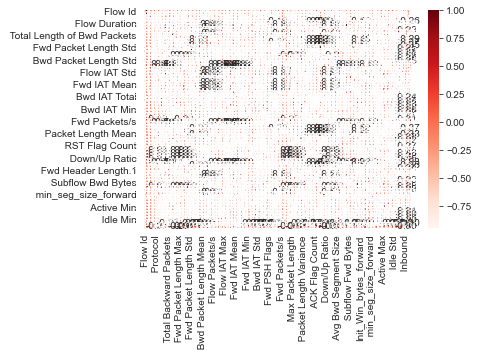

In [6]:
plt.rcParams['figure.figsize'] = (90,80)
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='Reds')

In [7]:
X = df.iloc[:,0:20]
y = df.iloc[:,-1]

In [10]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

ValueError: could not convert string to float: '192.168.50.6'